# Prompt Analysis

In [1]:
# %load_ext autoreload
# %autoreload 2

In [2]:
import sys
sys.path.append('../')

from utils import get_latex_table, compute_accuracies
from IPython.display import display

import torch
import numpy as np
from glob import glob
import pandas as pd

In [3]:
np.random.seed(42)

In [4]:
# Hyperparameters
num_repetitions = 5

# Load Embeddings

In [5]:
# load image features and labels
image_features = torch.load("../data/cars196/image_features.pt")
df = pd.read_csv("../data/cars196/Cars196.csv")

We only use the test images from the dataset.

In [6]:
cutoff = 8054
image_features = {i: item for i, item in image_features.items() if i > cutoff}
df = df[cutoff:]

In [7]:
image_features = [image_features[i] for i in sorted(image_features.keys())]
image_features = torch.tensor(np.stack(image_features, axis=0))

In [8]:
image_features.shape

torch.Size([8131, 512])

In [9]:
df

,img_name,class_name,class_index,manufacturer,model,type,year,color
8054,8055,FIAT 500 Abarth 2012,98,FIAT,500 Abarth,Hatchback,2012,black
8055,8056,FIAT 500 Abarth 2012,98,FIAT,500 Abarth,Hatchback,2012,black
8056,8057,FIAT 500 Abarth 2012,98,FIAT,500 Abarth,Hatchback,2012,black
8057,8058,FIAT 500 Abarth 2012,98,FIAT,500 Abarth,Hatchback,2012,black
8058,8059,FIAT 500 Abarth 2012,98,FIAT,500 Abarth,Hatchback,2012,black
...,...,...,...,...,...,...,...,...
16180,16181,smart fortwo Convertible 2012,195,smart,fortwo,Convertible,2012,black
16181,16182,smart fortwo Convertible 2012,195,smart,fortwo,Convertible,2012,other
16182,16183,smart fortwo Convertible 2012,195,smart,fortwo,Convertible,2012,red
16183,16184,smart fortwo Convertible 2012,195,smart,fortwo,Convertible,2012,white


# Car Model

In [12]:
# # Scrapes all car model names from the kbb page
# car_models = pd.read_html("https://www.kbb.com/car-make-model-list/new/view-all/make/")
# all_models = car_models[0]["Make"] + " " + car_models[0][".css-z687n{margin:10px 24px 10px 0px;}Model"]
# all_models = all_models.dropna().tolist()
# all_models = list(set(all_models))

In [13]:
# torch.save(all_models, "../data/cars196/all_models_scraped_kbb_2022-08-17.pt")

In [15]:
all_models = torch.load("../data/cars196/all_models_scraped_kbb_2022-08-17.pt")

In [16]:
len(all_models)

553

In [17]:
# number_samples = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
number_samples = [110, 120, 130, 140, 150]

In [18]:
labels = df["class_name"].tolist()

for num_samples in number_samples:
    model_samples = []
    results_dfs = []
    for i in range(num_repetitions):
        model_sample = np.random.choice(all_models, num_samples, replace=False)
        model_samples.append(model_sample)
        texts = [f"a photo of a {m}" for m in model_sample]

        print(f"{num_samples} Samples; Run {i+1}")
        results = compute_accuracies(image_features, labels, texts, num_components=128, include_models=["ours"])
        results_dfs.append(results)

    results_mean = sum(results_dfs) / len(results_dfs)
    results_std = np.sqrt(sum([(df - results_mean)**2 for df in results_dfs]) / len(results_dfs))

    torch.save({
        "num_samples": num_samples,
        "model_samples": model_samples,
        "means": results_mean,
        "stds": results_std
    }, f"prompt_analysis_results/{num_samples}_samples.pt")

110 Samples; Run 1
Creating text features
Getting optimized CLIP performance


Loss (1745): 0.010866930708289146: : 1745it [00:12, 135.90it/s]


Finished optimization. Best loss (0.008945324458181858) achieved after 1645 iterations.
110 Samples; Run 2
Creating text features
Getting optimized CLIP performance


Loss (1520): 0.011797674000263214: : 1520it [00:12, 118.48it/s]


Finished optimization. Best loss (0.010914814658463001) achieved after 1420 iterations.
110 Samples; Run 3
Creating text features
Getting optimized CLIP performance


Loss (1358): 0.012299204245209694: : 1358it [00:17, 78.39it/s]


Finished optimization. Best loss (0.010449138469994068) achieved after 1258 iterations.
110 Samples; Run 4
Creating text features
Getting optimized CLIP performance


Loss (1302): 0.01239329669624567: : 1302it [00:10, 125.30it/s] 


Finished optimization. Best loss (0.011103208176791668) achieved after 1202 iterations.
110 Samples; Run 5
Creating text features
Getting optimized CLIP performance


Loss (1197): 0.012469707056879997: : 1197it [00:08, 134.71it/s]


Finished optimization. Best loss (0.012230615131556988) achieved after 1097 iterations.
120 Samples; Run 1
Creating text features
Getting optimized CLIP performance


Loss (1248): 0.014585975557565689: : 1248it [00:09, 130.98it/s]


Finished optimization. Best loss (0.01337459310889244) achieved after 1148 iterations.
120 Samples; Run 2
Creating text features
Getting optimized CLIP performance


Loss (2052): 0.01163273025304079: : 2052it [00:20, 100.62it/s] 


Finished optimization. Best loss (0.0103429164737463) achieved after 1952 iterations.
120 Samples; Run 3
Creating text features
Getting optimized CLIP performance


Loss (2595): 0.01134711317718029: : 2595it [00:26, 96.18it/s]  


Finished optimization. Best loss (0.010093646124005318) achieved after 2495 iterations.
120 Samples; Run 4
Creating text features
Getting optimized CLIP performance


Loss (1518): 0.0110417939722538: : 1518it [00:13, 109.61it/s]  


Finished optimization. Best loss (0.010892817750573158) achieved after 1418 iterations.
120 Samples; Run 5
Creating text features
Getting optimized CLIP performance


Loss (1687): 0.012092257849872112: : 1687it [00:14, 113.24it/s]


Finished optimization. Best loss (0.011334397830069065) achieved after 1587 iterations.
130 Samples; Run 1
Creating text features
Getting optimized CLIP performance


Loss (2370): 0.012716713361442089: : 2370it [00:27, 86.12it/s] 


Finished optimization. Best loss (0.011775221675634384) achieved after 2270 iterations.
130 Samples; Run 2
Creating text features
Getting optimized CLIP performance


Loss (1843): 0.014571169391274452: : 1843it [00:24, 74.77it/s]


Finished optimization. Best loss (0.014345630072057247) achieved after 1743 iterations.
130 Samples; Run 3
Creating text features
Getting optimized CLIP performance


Loss (1848): 0.015455317683517933: : 1848it [00:22, 81.97it/s] 


Finished optimization. Best loss (0.013896002434194088) achieved after 1748 iterations.
130 Samples; Run 4
Creating text features
Getting optimized CLIP performance


Loss (1690): 0.016017742455005646: : 1690it [00:13, 128.53it/s]


Finished optimization. Best loss (0.015314096584916115) achieved after 1590 iterations.
130 Samples; Run 5
Creating text features
Getting optimized CLIP performance


Loss (1413): 0.015868328511714935: : 1413it [00:10, 139.34it/s]


Finished optimization. Best loss (0.015044826082885265) achieved after 1313 iterations.
140 Samples; Run 1
Creating text features
Getting optimized CLIP performance


Loss (2685): 0.017380202189087868: : 2685it [00:22, 119.35it/s]


Finished optimization. Best loss (0.016968613490462303) achieved after 2585 iterations.
140 Samples; Run 2
Creating text features
Getting optimized CLIP performance


Loss (2853): 0.01715206541121006: : 2853it [00:24, 116.77it/s] 


Finished optimization. Best loss (0.01681957021355629) achieved after 2753 iterations.
140 Samples; Run 3
Creating text features
Getting optimized CLIP performance


Loss (1681): 0.019832907244563103: : 1681it [00:18, 89.99it/s]


Finished optimization. Best loss (0.019431505352258682) achieved after 1581 iterations.
140 Samples; Run 4
Creating text features
Getting optimized CLIP performance


Loss (2795): 0.01850137673318386: : 2795it [00:28, 96.79it/s]  


Finished optimization. Best loss (0.0184063371270895) achieved after 2695 iterations.
140 Samples; Run 5
Creating text features
Getting optimized CLIP performance


Loss (2421): 0.018231680616736412: : 2421it [00:23, 102.95it/s]


Finished optimization. Best loss (0.017495816573500633) achieved after 2321 iterations.
150 Samples; Run 1
Creating text features
Getting optimized CLIP performance


Loss (2643): 0.022859107702970505: : 2643it [00:24, 107.72it/s]


Finished optimization. Best loss (0.02268695831298828) achieved after 2543 iterations.
150 Samples; Run 2
Creating text features
Getting optimized CLIP performance


Loss (2811): 0.02330043725669384: : 2811it [00:20, 135.53it/s] 


Finished optimization. Best loss (0.022672148421406746) achieved after 2711 iterations.
150 Samples; Run 3
Creating text features
Getting optimized CLIP performance


Loss (3161): 0.023913681507110596: : 3161it [00:26, 118.83it/s]


Finished optimization. Best loss (0.02364715002477169) achieved after 3061 iterations.
150 Samples; Run 4
Creating text features
Getting optimized CLIP performance


Loss (2865): 0.02200642041862011: : 2865it [00:28, 101.26it/s] 


Finished optimization. Best loss (0.021673500537872314) achieved after 2765 iterations.
150 Samples; Run 5
Creating text features
Getting optimized CLIP performance


Loss (2864): 0.024194661527872086: : 2864it [00:42, 67.23it/s]


Finished optimization. Best loss (0.02401668392121792) achieved after 2764 iterations.


# Visualization

In [19]:
from glob import glob
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

plt.style.use(['science'])

In [20]:
plt.rcParams["figure.figsize"]

[3.5, 2.625]

<Figure size 252x189 with 0 Axes>

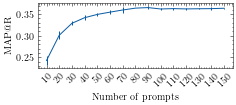

In [25]:
model_to_name = {
    "\model": "CLIP-DML",
    "Rand. transform": "Rand. trans."
}

files = glob(f"prompt_analysis_results/*_samples.pt")
data = [torch.load(f) for f in files]
data = sorted(data, key=lambda x: x["num_samples"])

metric = "mean_average_precision_at_r"
model = "\model"

plt.clf()
plt.figure(figsize=(3.5, 1.2))


x = np.array([d["num_samples"] for d in data])
means = np.array([d["means"][model][metric] for d in data])
stds = np.array([d["stds"][model][metric] for d in data])

plt.errorbar(x, means, yerr=stds, label=model_to_name.get(model, model))

plt.xticks(x, rotation=45)
# plt.legend(loc="upper right")
plt.xlabel("Number of prompts")
plt.ylabel("MAP@R")

plt.savefig(f"prompt_analysis_results/cars196.pdf", bbox_inches="tight")
plt.show()